# Avocado Data Analysis Notebook
ALT-TAB LABS LLP &copy; 2020 All Rights Reserved

In [33]:
# load csvs
import pandas as pd
df_train = pd.read_csv('avocado-train.csv', index_col='id')

In [34]:
# View the data!
df_train.head()
df_train.describe()

,DataBatch,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,AveragePrice
count,12774.000000,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,12774.000000,12774.000000
mean,24.160561,8.372151e+05,2.860019e+05,2.937244e+05,2.269924e+04,2.347873e+05,1.783168e+05,5.341248e+04,3058.006595,1.407545
std,15.506127,3.456893e+06,1.254180e+06,1.221050e+06,1.109128e+05,9.815942e+05,7.427216e+05,2.421722e+05,18243.520401,0.403474
min,0.000000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.480000
25%,10.000000,1.081454e+04,8.546775e+02,2.963293e+03,0.000000e+00,5.011590e+03,2.826270e+03,1.229900e+02,0.000000,1.100000
50%,24.000000,1.069675e+05,8.640510e+03,2.893430e+04,1.803650e+02,3.922292e+04,2.589329e+04,2.603385e+03,0.000000,1.370000
75%,38.000000,4.196674e+05,1.090417e+05,1.436499e+05,6.045980e+03,1.079063e+05,8.184397e+04,2.142326e+04,113.352500,1.660000
max,52.000000,5.228870e+07,1.893304e+07,2.047057e+07,2.546439e+06,1.597249e+07,1.171281e+07,4.081398e+06,551693.650000,3.250000


In [35]:
# Clean Data

# Drops missing values 
df_train = df_train.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_train.type = [types[x] for x in df_train.type]
regions = df_train.region.unique()
regionDict = {}
id=1
for region in regions:
    regionDict[region] = id
    id+=1
print(regionDict)
df_train.region = [regionDict[x] for x in df_train.region]
df_train['year'] = [x[:4] for x in df_train.Date]
df_train['month'] = [x[5:7] for x in df_train.Date]

# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

{'NewOrleansMobile': 1, 'HarrisburgScranton': 2, 'Atlanta': 3, 'BuffaloRochester': 4, 'Pittsburgh': 5, 'Jacksonville': 6, 'Columbus': 7, 'Denver': 8, 'West': 9, 'DallasFtWorth': 10, 'Syracuse': 11, 'GrandRapids': 12, 'Detroit': 13, 'GreatLakes': 14, 'MiamiFtLauderdale': 15, 'SouthCentral': 16, 'NewYork': 17, 'HartfordSpringfield': 18, 'Sacramento': 19, 'Boston': 20, 'RaleighGreensboro': 21, 'TotalUS': 22, 'Roanoke': 23, 'Philadelphia': 24, 'Spokane': 25, 'LosAngeles': 26, 'Nashville': 27, 'NorthernNewEngland': 28, 'Chicago': 29, 'Houston': 30, 'Plains': 31, 'BaltimoreWashington': 32, 'CincinnatiDayton': 33, 'WestTexNewMexico': 34, 'Portland': 35, 'StLouis': 36, 'Southeast': 37, 'Seattle': 38, 'SouthCarolina': 39, 'Tampa': 40, 'California': 41, 'Northeast': 42, 'Orlando': 43, 'Charlotte': 44, 'LasVegas': 45, 'SanDiego': 46, 'Boise': 47, 'PhoenixTucson': 48, 'Albany': 49, 'RichmondNorfolk': 50, 'Indianapolis': 51, 'Louisville': 52, 'SanFrancisco': 53, 'Midsouth': 54}


In [36]:
# Select data for learning
features = ['TotalVolume', 'SmallBags', 'LargeBags', 'region', '4046', '4225', '4770', 'DataBatch', 'year', 'month']
target = 'AveragePrice'

X = df_train[features]
y = df_train[target]

# Regression Time!

In [37]:
# Sci Kit Learn! Scientific Computing library for python
from sklearn import *

In [38]:
# Pick the regression model we want to use

# Decision Tree Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# model = tree.DecisionTreeRegressor(random_state=2020)

# Random Forest Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
model = ensemble.ExtraTreesRegressor(random_state=2021, n_estimators=700, criterion='mse', verbose=1, n_jobs=int(16))
# model = ensemble.AdaBoostRegressor(base_estimator=model, n_estimators=10)

In [39]:
# Split training into some for training and some for testing
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.99, random_state=2021)

print("training split: ", len(Xtrain), "; test split: ", len(Xtest))



training split:  127 ; test split:  12647


In [40]:
# Perform regression on the data
model.fit(X, y) #TODO TODO TODO TODO TODO TODO TODO TODO

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    4.8s finished


ExtraTreesRegressor(n_estimators=700, n_jobs=16, random_state=2021, verbose=1)

In [41]:
# Score model
model.score(Xtest, ytest) #TODO TODO TODO TODO TODO TODO TODO TODO

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.9s finished


1.0

# Predict for Testing data

In [42]:
df_test = pd.read_csv('avocado-test.csv', index_col='id')
# Clean Data

# Drops missing values
df_test = df_test.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_test.type = [types[x] for x in df_test.type]
regions = df_test.region.unique()
for region in regions:
    if region not in regionDict.keys():
        regionDict[region] = 0
df_test.region = [regionDict[x] for x in df_test.region]
df_test['year'] = [x[0:4] for x in df_test.Date]
df_test['month'] = [x[5:7] for x in df_test.Date]
# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [43]:
# Select features
XforPredictions = df_test[features] #TODO TODO TODO TODO TODO TODO TODO TODO
XforPredictions.head()

,TotalVolume,SmallBags,LargeBags,region,4046,4225,4770,DataBatch,year,month
id,,,,,,,,,,
0,28969.34,1526.66,0.00,29,80.77,27361.91,0.00,21,2016,07
1,322962.89,22942.48,46083.51,28,5632.85,242365.82,2441.56,19,2017,08
2,155334.45,27302.29,50305.72,14,3657.79,74068.65,0.00,49,2017,01
3,10231.74,303.33,1067.52,33,341.89,8519.00,0.00,12,2015,10
4,10652.02,3706.55,0.00,30,6905.95,39.52,0.00,10,2015,10


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s


Predictions: [1.92704286 1.64825714 1.21047143 ... 1.52737143 1.80507143 1.61412857]


[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


(array([  97.,  553., 1318., 1128., 1116.,  774.,  324.,  102.,   33.,
          30.]),
 array([0.54701429, 0.77365429, 1.00029429, 1.22693429, 1.45357429,
        1.68021429, 1.90685429, 2.13349429, 2.36013429, 2.58677429,
        2.81341429]),
 <BarContainer object of 10 artists>)

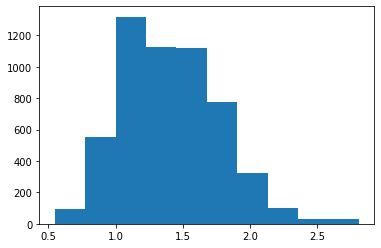

In [44]:
# Make Predictions!
yPredictions = model.predict(XforPredictions) #TODO TODO TODO TODO TODO TODO TODO TODO
print("Predictions:", yPredictions)
import matplotlib.pyplot as plt
plt.hist(yPredictions)

In [45]:
# Save to CSV File!
output = pd.DataFrame({'id': XforPredictions.index, 'AveragePrice': yPredictions})
output.to_csv('avocado-submission.csv', index=False)
print(output)

        id  AveragePrice
0        0      1.927043
1        1      1.648257
2        2      1.210471
3        3      1.563829
4        4      1.481486
...    ...           ...
5470  5470      1.695529
5471  5471      1.377214
5472  5472      1.527371
5473  5473      1.805071
5474  5474      1.614129

[5475 rows x 2 columns]


# Upload for grading

In [46]:
# Download CTFSG Grader Libraries
# import urllib.request, os
# urllib.request.urlretrieve('https://raw.githubusercontent.com/alttablabs/ctfsg-utils/master/pyctfsglib.py', './pyctfsglib.py')
# print('Downloaded pyctfsglib.py:', 'pyctfsglib.py' in os.listdir())

In [47]:
# Connect to graders
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/alien/Documents/PyCharm Projects/Cyberthon 2021/pyctfsglib.py')
import pyctfsglib as ctfsg
import random

USER_TOKEN = "BLnMfacYpsCWrIDWMDNlysDhKMpumnYoldUyhyKlCcJLfeiyeKEvhzxuivdCMwky" # You need to fill this up
GRADER_URL = random.choice([ # Check if these are correct GRADER URLS for the specific challenge
    "http://3qo9k5hk5cprtqvnlkvotlnj9d14b7mt.ctf.sg:60010/",
    "http://3qo9k5hk5cprtqvnlkvotlnj9d14b7mt.ctf.sg:60011/"
])

grader = ctfsg.DSGraderClient(GRADER_URL, USER_TOKEN)

DSGraderClient: Successfully Connected!
[SERVER] MOTD: CHECK your USER_TOKEN and GRADER_URL HTTP address! I'm AVOCADO_PRICE @e65b946b172c


In [48]:
grader.submitFile('avocado-submission.csv')

ProofOfWork Challenge =>  ('CTFSGRB86a0caa574be847ab86d5bb115da0771', 22)
ProofOfWork Answer Found! =>  7573801


'{"challenge":{"name":"AvocadoRegression"},"id":"cknbk1pq1ccji08241mp3zzte","status":"PARTIALLY_CORRECT","multiplier":0.9283,"submittedBy":{"username":"hci-37"},"createdAt":"2021-04-10T09:47:55Z"}'